In [1]:
import numpy as np
import random
random.seed(100)
import matplotlib.pyplot as plt

# a)

In [2]:
def board_create():
    A = np.matrix(' "0" ,"0","0";"0","0","0";"0","0","0"')
    return (A)

In [3]:
K = board_create()
K

matrix([['0', '0', '0'],
        ['0', '0', '0'],
        ['0', '0', '0']], dtype='<U1')

In [4]:
def free_space (A):
    R = []
    for i in range (len(A)):
        for j in range (len(A)):
            if (A[i,j] == "0"):
                R.append([i,j])
            
    return (R)
        
    

In [5]:
M = free_space(K)
M

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]

In [6]:
def put_mark_random(char, A):
    if (free_space(A) != []):
        M = free_space(A)
        q = random.randint(0, len(M)-1)
        x = M[q][0]
        y = M[q][1]
        A[x,y] = char
        return 1
    else:
        return 0
        

We will play with x and y

In [7]:
K

matrix([['0', '0', '0'],
        ['0', '0', '0'],
        ['0', '0', '0']], dtype='<U1')

In [8]:
def win_line (A,char):
    check = False
    for i in range (len(A)):
        if (A[i,0] == A[i,1] == A[i,2] == char):
            check = True
            
    return check
    
            

In [9]:
put_mark_random("x",K)
put_mark_random("y",K)
put_mark_random("x",K)
put_mark_random("y",K)
put_mark_random("x",K)
put_mark_random("y",K)
put_mark_random("x",K)
put_mark_random("y",K)
put_mark_random("x",K)
put_mark_random("x",K)

0

In [10]:
K

matrix([['y', 'y', 'x'],
        ['x', 'x', 'y'],
        ['x', 'x', 'y']], dtype='<U1')

In [11]:
win_line(K,"y")

False

In [12]:
def win_column (A,char):
    check = False
    for j in range (len(A)):
        if (A[0,j] == A[1,j] == A[2,j] == char):
            check = True
            
    return check

In [13]:
def win_diag (A,char):
    check = False
    if (A[0,0] == A[1,1] == A[2,2] == char) or (A[0,2] == A[1,1] == A[2,0] == char):
        check = True
    return check

In [14]:
win_diag (K,"x")
test = np.matrix(' "x" ,"x","y";"y","y","x";"x","y","x"')
test

matrix([['x', 'x', 'y'],
        ['y', 'y', 'x'],
        ['x', 'y', 'x']], dtype='<U1')

In [15]:
def winner_is (A, char1,char2):
    winner = 'no answer'
    if (win_line(A, char1) or win_column(A,char1) or win_diag(A,char1)): 
        winner = char1
    if (win_line(A, char2) or win_column(A,char2) or win_diag(A,char2)): 
        winner = char2
    if (win_line(A, char2) or win_column(A,char2) or win_diag(A,char2)) and (win_line(A, char1) or win_column(A,char1) or win_diag(A,char1)): 
        winner = char1
    if (winner!= char1) and (winner!=char2) and (free_space(A) == []):
        winner = 'no winner'
    return winner

In [16]:
winner_is(test,"x","y")
free_space(test)

[]

In [17]:
winner_is(K,"x","y")

'x'

Start of the game

In [18]:
def game(char1,char2):
   
    board = board_create()
    answer = winner_is(board,char1,char2)
    while (answer == 'no answer'):
        put_mark_random(char1,board)
        put_mark_random(char2,board)
        answer = winner_is(board,char1,char2)
        #print (board)
    return answer
        


In [19]:
k = game('x','y')
k

'y'

# b)

In [20]:
nw = 0
ch1 = 0
ch2 = 0
char1 = input("Enter mark of the player 1 \n")
char2 = input("Enter mark of the player 2 \n")
for i in range(0,1000):
    k = game(char1,char2)
    if (k == 'x'):
        ch1 = ch1+1
    if (k == 'y'):
        ch2 = ch2+1
    if (k == 'no winner'):
        nw = nw+1
        
print (ch1, ch2, nw)
perc_1 = ch1/(ch1+ch2+nw)
perc_2 = ch2/(ch1+ch2+nw)
perc_nw = nw/(ch1+ch2+nw)

Enter mark of the player 1 
x
Enter mark of the player 2 
y
604 270 126


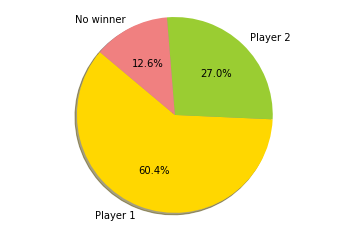

In [21]:
labels = 'Player 1', 'Player 2', 'No winner'
sizes = [ch1, ch2, nw]
colors = ['gold', 'yellowgreen', 'lightcoral']
# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()



# c)

making board with mark in the center

In [22]:
def game_new(char1,char2):
   
    board = board_create()
    answer = winner_is(board,char1,char2)
    board[1,1] = char1
    put_mark_random(char2,board)
    while (answer == 'no answer'):
        put_mark_random(char1,board)
        put_mark_random(char2,board)
        answer = winner_is(board,char1,char2)
        #print (board)
    return answer

In [23]:
game_new('x','y')


'x'

# d)

In [24]:
nw = 0
ch1 = 0
ch2 = 0
char1 = input("Enter mark of the player 1 \n")
char2 = input("Enter mark of the player 2 \n")
for i in range(0,1000):
    k = game_new(char1,char2)
    if (k == 'x'):
        ch1 = ch1+1
    if (k == 'y'):
        ch2 = ch2+1
    if (k == 'no winner'):
        nw = nw+1
        
print (ch1, ch2, nw)
perc_1 = ch1/(ch1+ch2+nw)
perc_2 = ch2/(ch1+ch2+nw)
perc_nw = nw/(ch1+ch2+nw)

Enter mark of the player 1 
x
Enter mark of the player 2 
y
685 197 118


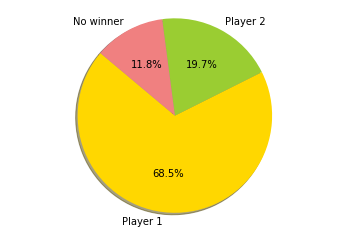

In [25]:
labels = 'Player 1', 'Player 2', 'No winner'
sizes = [ch1, ch2, nw]
colors = ['gold', 'yellowgreen', 'lightcoral']
# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()